<a href="https://colab.research.google.com/github/devlab11/legal_ru_models/blob/main/LegalRuModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Copyright 2020 Mitlabs.**

Licensed under the Apache License, Version 2.0 (the "License");

# LegalRuModels

Фемида и трансформеры:
использование лингвистических моделей на основе архитектуры “трансформер” в юридической практике. 


<table class="tfo-notebook-buttons" align="left">
  
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1x2R3HjqFgYMDMp7uYMNm9tkBf9u4WkXR?authuser=1#scrollTo=MfBg1C5NB3X0"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/devlab11/legal_ru_models/blob/main/LegalRuModels.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://colab.research.google.com/drive/1x2R3HjqFgYMDMp7uYMNm9tkBf9u4WkXR?usp=sharing"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  
</table>

# Setup

In [1]:
!pip install transformers
!pip install tensorflow_text
!pip install bokeh
!pip install simpleneighbors[annoy]
!pip install tqdm

     |████████████████████████████████| 1.8MB 7.6MB/s 
     |████████████████████████████████| 2.9MB 35.1MB/s 
     |████████████████████████████████| 890kB 47.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=14e22f9fc99f165e15424a68c48be99a2957996fa78783a2333d95bd26aef73e
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 3.4MB 9.1MB/s 
     |████████████████████████████████| 655kB 7.6MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp36-cp36m-linux_x86_64.whl size=390344 sha256=287eccaac706ea7033b4f9d007a6e9a48a298455785f0b7122d7815f25c6a7bc
  Stored in directory: /root/.cache/pip/wheels/3a/c5/59/cce7e67b52c8e987389e53f917b6bb2a9d904a03246fadcb1e
Successfully built annoy


In [2]:
!pip install laserembeddings[ru]
from laserembeddings import Laser
!python -m laserembeddings download-models

     |████████████████████████████████| 860kB 7.9MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.35-cp36-none-any.whl size=884000 sha256=1c23059e7fa70dc59ae3036319442150e33576d83b53cce39fcf1689ff2a626f
  Stored in directory: /root/.cache/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
Successfully built sacremoses
  Found existing installation: sacremoses 0.0.43
    Uninstalling sacremoses-0.0.43:
      Successfully uninstalled sacremoses-0.0.43

✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/93langs.fcodes    
✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/93langs.fvocab    
✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/bilstm.93langs.2018-12-26.pt    

✨ You're all set!


In [3]:
import pickle
import time
import warnings

import transformers as ppb
warnings.filterwarnings('ignore')
import bz2
import csv
import _pickle as cPickle
from numpy import savetxt

from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, BertModel
from transformers import AutoModel,AutoTokenizer, AutoModelWithLMHead
from transformers import LongformerModel, LongformerTokenizer
from transformers import (ElectraConfig, ElectraForMaskedLM,
                          ElectraForPreTraining, ElectraForTokenClassification,
                          ElectraModel, ElectraTokenizerFast)
import pickle
import _pickle as cPickle
import numpy as np
import pandas as pd
import torch
import gc
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import matplotlib as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
import time
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc, roc_curve
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from itertools import zip_longest
import re

import bokeh
import bokeh.models
import bokeh.plotting
import os
import pandas as pd
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from tensorflow_text import SentencepieceTokenizer
import sklearn.metrics.pairwise

from simpleneighbors import SimpleNeighbors
from tqdm import tqdm
from tqdm import trange


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Download models

In [4]:
legal_ru_electra = "1_FlnOa7SXmWtmLlmascK5EZHb3b3kHKF"
legal_ru_longformer = "1bTIbrGIZ-vElBosEzaCP4Mc1ghNFu8NN"
legal_ru_bert = "1Y8QqolrGGNqmaZKBM8OSk4CrV0QPPUAy"

models = ['legal_ru_electra', 'legal_ru_longformer', 'legal_ru_bert' ]
id_model = ["1_FlnOa7SXmWtmLlmascK5EZHb3b3kHKF", "1bTIbrGIZ-vElBosEzaCP4Mc1ghNFu8NN", "1Y8QqolrGGNqmaZKBM8OSk4CrV0QPPUAy" ]
#ID_MODEL = "legal_ru_electra" #@param ["legal_ru_electra", "legal_ru_longformer", "legal_ru_bert"]

for id, model in zip(id_model, models):
  file_name = f'{model}.zip'
  print(file_name)
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$id' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$id" -O file_name && rm -rf /tmp/cookies.txt
  !unzip -uq file_name
  module_url = f'/content/{model}'

legal_ru_electra.zip
--2021-02-02 10:31:45--  https://docs.google.com/uc?export=download&confirm=KRFr&id=1_FlnOa7SXmWtmLlmascK5EZHb3b3kHKF
Resolving docs.google.com (docs.google.com)... 74.125.195.113, 74.125.195.138, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-b0-docs.googleusercontent.com/docs/securesc/58q82jj1c7rnbu17v1jbq90c8hqvsucn/05rsvmrectnpsrgqlcsg0kd07192ur8n/1612261875000/18010547156067015791/06359772725752963980Z/1_FlnOa7SXmWtmLlmascK5EZHb3b3kHKF?e=download [following]
--2021-02-02 10:31:45--  https://doc-08-b0-docs.googleusercontent.com/docs/securesc/58q82jj1c7rnbu17v1jbq90c8hqvsucn/05rsvmrectnpsrgqlcsg0kd07192ur8n/1612261875000/18010547156067015791/06359772725752963980Z/1_FlnOa7SXmWtmLlmascK5EZHb3b3kHKF?e=download
Resolving doc-08-b0-docs.googleusercontent.com (doc-08-b0-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:40

# Dataset

In [5]:
id = '1AwF05o4fKS9W9uam8QaTuncxwTLPOixK'

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$id' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$id" -O contract_labels-15000.zip && rm -rf /tmp/cookies.txt
!unzip -uq contract_labels-15000.zip

--2021-02-02 10:32:16--  https://docs.google.com/uc?export=download&confirm=&id=1AwF05o4fKS9W9uam8QaTuncxwTLPOixK
Resolving docs.google.com (docs.google.com)... 74.125.195.100, 74.125.195.101, 74.125.195.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-b4-docs.googleusercontent.com/docs/securesc/ebku907g30acjcm1qnkrfuq2kuqfg1fo/l0rc9bm12dsb3gikeqnab508vuntgie3/1612261875000/18010547156067015791/10323473907605367899Z/1AwF05o4fKS9W9uam8QaTuncxwTLPOixK?e=download [following]
--2021-02-02 10:32:18--  https://doc-0o-b4-docs.googleusercontent.com/docs/securesc/ebku907g30acjcm1qnkrfuq2kuqfg1fo/l0rc9bm12dsb3gikeqnab508vuntgie3/1612261875000/18010547156067015791/10323473907605367899Z/1AwF05o4fKS9W9uam8QaTuncxwTLPOixK?e=download
Resolving doc-0o-b4-docs.googleusercontent.com (doc-0o-b4-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to 

In [6]:
name_dataset = '/content/contract_labels-15000.tsv'

# Creating Embeddings

In [7]:
url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'
embed_text = hub.load(url)

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder-multilingual/3, Total size: 266.88MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3'.


In [8]:
path = '/content/'   # путь к папке
# path = '/content/drive/MyDrive/MODELS/create_embed/'
name_dataset = f'{path}contract_labels-15000.tsv'   # название полученного файла
batch = 80                                         # количество строк проходимых через модель
features_files = []
module_urls = [ 'legal_ru_electra', 'legal_ru_bert' ,'laser','rubert', 'muse']#, 'legal_ru_longformer'] #
for module_url in module_urls:
    if module_url == 'muse':
      pass      
    elif module_url == 'laser':
       model = Laser()  
    else:   
      if module_url == 'legal_ru_electra':
        model = ElectraModel.from_pretrained(module_url)
        tokenizer = ElectraTokenizerFast.from_pretrained(module_url)        
      elif module_url == 'legal_ru_longformer':
        model = LongformerModel.from_pretrained(module_url)
        tokenizer = LongformerTokenizer.from_pretrained(module_url)        
      elif module_url == 'legal_ru_bert':
        model = BertModel.from_pretrained(module_url)
        tokenizer = BertTokenizer.from_pretrained(module_url) 
      elif module_url == 'rubert':
        tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
        model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")         
      device = torch.device("cuda:0")
      model.to(device) 
    features_file =  f'{path}{module_url}_features_batch_{batch}.txt' # файл с эмбендингами    
    df = pd.read_csv(name_dataset, delimiter='\t')
    print(df, len(df))
    labels = df['labels']
    text = df['text']
    counter = 0
    features_list = []
    c=0
    while counter < len(df):
      t0 = time.time()
      try:
        batch_1 = df[counter:counter+batch]        
        counter = counter + batch
        print("Counter is : " + str(counter))
        if module_url == 'muse':                          
            features = embed_text(batch_1)
            features_list.append(features)
            with open(features_file, "ab" ) as f:          
                  np.savetxt(f, features, newline='\n')
                  del features
                  torch.cuda.empty_cache()      
        elif module_url == 'laser':
            features = model.embed_sentences(batch_1,  lang='ru')            
            features_list.append(features)
            with open(features_file, "ab" ) as f:          
                  np.savetxt(f, features, newline='\n')
                  del features
                  torch.cuda.empty_cache()      
        else:        
            if module_url == 'legal_ru_longformer':
              tokenized = batch_1['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))              
              max_len = 0
              for i in tokenized.values:
                  if len(i) > max_len:
                      max_len = len(i)
              padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])              
              input_ids = torch.tensor(padded).to(device)
              attention_mask = torch.ones(input_ids.shape, dtype=torch.long, device=input_ids.device).to(device) 
              attention_mask[:, [0,-1]] = 2 
            elif module_url == 'legal_ru_electra' or module_url == 'legal_ru_bert' or module_url == 'rubert':
              tokenized = batch_1['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))              
              max_len = 0
              for i in tokenized.values:
                  if len(i) > max_len:
                      max_len = len(i)
              padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])              
              attention_mask = np.where(padded != 0, 1, 0)
              input_ids = torch.tensor(padded).to(device)
              attention_mask = torch.tensor(attention_mask).to(device)              
            with torch.no_grad(): 
                last_hidden_states = model(input_ids, attention_mask=attention_mask)       
                features = last_hidden_states[0][:,0,:].cpu().numpy()               
                features_list.append(features)
                with open(features_file, "ab" ) as f:          
                  np.savetxt(f, features, newline='\n')
                  del features
                  torch.cuda.empty_cache()      
      except Exception as e:
        print('Error!!!', e)
        c+=1      
      t1 = time.time()
      total = t1-t0
      print('Total time is: ', total)
      print('количество выпадших строк = ', c*batch)
      print('ГОТОВО!!!, файл с эмбендингами лежит в', features_file)
      features_files.append(features_file)


                                                    text              labels
0      Стороны обязуются соблюдать конфиденциальность...  конфиденциальность
1      Стороны не вправе передавать указанный Договор...  конфиденциальность
2      Передача настоящего Договора, документации или...  конфиденциальность
3      Стороны обязуются соблюдать конфиденциальность...  конфиденциальность
4      Стороны не вправе передавать указанный Договор...  конфиденциальность
...                                                  ...                 ...
69247  При поставке Товара Поставщик передает Заказчи...            качество
69248  Поставщик обязуется устранить недостачу или за...            качество
69249  Заказчик в праве предъявить претензии Поставщи...            качество
69250  Устранение недостатков, поставка недостающего ...            качество
69251  Тара и упаковка должны обеспечить сохранность ...            качество

[69252 rows x 2 columns] 69252
Counter is : 80
Total time is:  0.3505785465

Some weights of BertModel were not initialized from the model checkpoint at legal_ru_bert and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Выходные данные были обрезаны до нескольких последних строк (5000).
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/legal_ru_bert_features_batch_80.txt
Counter is : 38960
Total time is:  0.6279699802398682
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/legal_ru_bert_features_batch_80.txt
Counter is : 39040
Total time is:  0.6321384906768799
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/legal_ru_bert_features_batch_80.txt
Counter is : 39120
Total time is:  0.344419002532959
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/legal_ru_bert_features_batch_80.txt
Counter is : 39200
Total time is:  0.4424421787261963
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/legal_ru_bert_features_batch_80.txt
Counter is : 39280
Total time is:  1.0435853004455566
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/legal_ru_

Выходные данные были обрезаны до нескольких последних строк (5000).
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/rubert_features_batch_80.txt
Counter is : 38960
Total time is:  0.6380846500396729
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/rubert_features_batch_80.txt
Counter is : 39040
Total time is:  0.6704175472259521
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/rubert_features_batch_80.txt
Counter is : 39120
Total time is:  0.37779736518859863
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/rubert_features_batch_80.txt
Counter is : 39200
Total time is:  0.4374270439147949
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/rubert_features_batch_80.txt
Counter is : 39280
Total time is:  1.0655887126922607
количество выпадших строк =  0
ГОТОВО!!!, файл с эмбендингами лежит в /content/rubert_features_batch_80.txt
Counter is : 

# Classification

In [9]:
module_urls = ['tfidf','laser',  'legal_ru_longformer', 'legal_ru_electra', 'legal_ru_bert','rubert']#'muse']

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
path = '/content/'   # путь к папке
#path = '/content/drive/MyDrive/MODELS/create_embed/'
batch = 80   
metrics_dict = {}
name_dataset = f'{path}contract_labels-15000.tsv'
metrics_dict['Metric (weighted)'] = ['precision', 'recall', 'f1']
for module_url in module_urls:
      print('module_url: ', module_url)
      df = pd.read_csv(name_dataset, delimiter='\t')
      if module_url == 'tfidf':
        print('tfidf')
        data =  df['text']
        tf_idf_vectorizor =  TfidfVectorizer(max_features = 20)
        tf_idf = tf_idf_vectorizor.fit_transform( data)
        tf_idf_norm =  normalize(tf_idf)
        features = tf_idf_norm.toarray()
      else:
        features_file = f'{path}{module_url}_features_batch_{batch}.txt'
        with open(features_file, "rb") as f:    
            features = np.loadtxt(f)
      len_features = len(features)
      print(len(features))
      labels = df['labels'][:len_features]
      print(len(labels))                                            
      labels = label_binarize(labels, classes=['качество', 'конфиденциальность','обязанности сторон','оплат', 'ответственность сторон', 'предмет договора', 'приёмка товара', 'прочие условия', 'споров', 'срок действия договора','сроки поставки', 'форс-мажор' ])
      n_classes = labels.shape[1]
      print(n_classes )
      train_features, test_features, train_labels, test_labels = train_test_split(features, labels)
      # Выбираем классификатор
      names = ['OVR_RandomForestClassifier']
      # Задаем параметры классификатора
      classifiers = [
          OneVsRestClassifier(RandomForestClassifier())
          ]
      for name, clf in zip(names, classifiers):
          t0 = time.time() 
          clf.fit(train_features, train_labels) 
          print (str(clf))
          path_algoritm = f'{path}/{module_url}_{name}'
          with open (path_algoritm, 'wb') as f:
              pickle.dump(clf, f)    
          # with open (path_algoritm, 'rb') as f:
          #     clf =  pickle.load(f)
          predictions = clf.predict(test_features)
          print(metrics.classification_report(test_labels, predictions))
          accuracy_score = metrics.accuracy_score(test_labels, predictions)
          print('accuracy_score ', accuracy_score )   
          #y_score = clf.decision_function(test_features)   
          y_score = clf.predict_proba(test_features)          
          #precision_recall_curve
          precision = dict()
          recall = dict()
          average_precision = dict()
          for i in range(n_classes):
              precision[i], recall[i], _ = precision_recall_curve(test_labels[:, i],y_score[:, i])
              average_precision[i] = average_precision_score(test_labels[:, i], y_score[:, i])
          # A "micro-average": quantifying score on all classes jointly
          precision["micro"], recall["micro"], _ = precision_recall_curve(test_labels.ravel(),y_score.ravel())
          average_precision["micro"] = average_precision_score(test_labels, y_score, average="micro")
          print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
          # Заполнение таблицы со значениеями          
          precision_score = metrics.precision_score(test_labels, predictions, average='weighted')
          recall_score = metrics.recall_score(test_labels, predictions, average='weighted')
          f1_score = metrics.f1_score(test_labels, predictions, average='weighted')          
          print(f'{module_url}: recall_score={recall_score},  precision_score={precision_score},  f1_score={f1_score} ')          
          roc_auc = dict()          
          fpr = dict()
          tpr = dict()
          roc_auc = dict()
          for i in range(n_classes):
              fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_score[:, i])
              roc_auc[i] = auc(fpr[i], tpr[i])
              # Compute micro-average ROC curve and ROC area
              fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), y_score.ravel())
              roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])             
          metrics_dict['Metric (weighted)'] = ['PRECISION', 'RECALL', 'f1', 'ROC-AUC', 'AVERAGE PRECISION SCORE']    
          metrics_dict[module_url] = [precision_score, recall_score, f1_score, roc_auc["micro"] , average_precision["micro"]]

module_url:  tfidf
tfidf
69252
69252
12
OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
    

In [12]:
df1 = pd.DataFrame((metrics_dict), columns = list(metrics_dict.keys()), index = None)
df1

,Metric (weighted),tfidf,laser,legal_ru_longformer,legal_ru_electra,legal_ru_bert,rubert
0,PRECISION,0.521442,1.0,0.872542,0.852992,0.888169,0.860367
1,RECALL,0.158567,1.0,0.077992,0.259968,0.201999,0.224205
2,f1,0.239024,1.0,0.140935,0.383072,0.319514,0.342989
3,ROC-AUC,0.768945,1.0,0.776322,0.885736,0.830344,0.857893
4,AVERAGE PRECISION SCORE,0.308211,1.0,0.337568,0.568450,0.464732,0.497708


## precision_recall_curve

In [13]:
module_urls = [ 'tfidf',  'legal_ru_longformer', 'legal_ru_electra', 'legal_ru_bert', 'rubert']

tfidf
tfidf
Average precision score, micro-averaged over all classes: 0.31
legal_ru_longformer
Average precision score, micro-averaged over all classes: 0.34
legal_ru_electra
Average precision score, micro-averaged over all classes: 0.57
legal_ru_bert
Average precision score, micro-averaged over all classes: 0.46
rubert
Average precision score, micro-averaged over all classes: 0.49


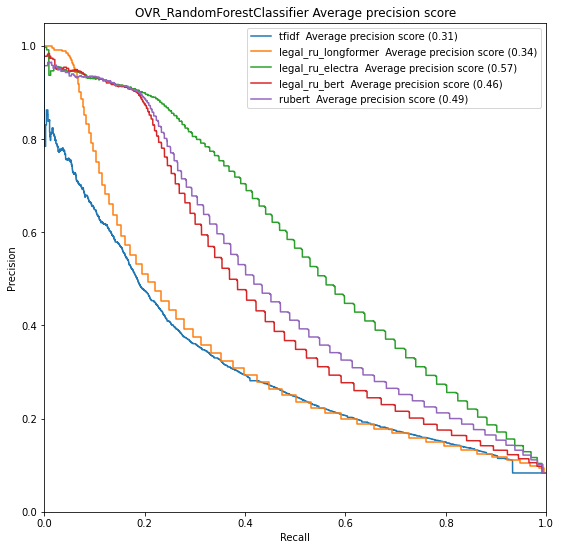

In [14]:
#path = '/content/'   # путь к папке
batch = 80
name_dataset = f'{path}contract_labels-15000.tsv'
fig, axs = plt.subplots(figsize=(9, 9))
for module_url in module_urls:
      print(module_url)
      df = pd.read_csv(name_dataset, delimiter='\t')
      if module_url == 'tfidf':
        print('tfidf')
        data =  df['text']
        tf_idf_vectorizor =  TfidfVectorizer(max_features = 20)
        tf_idf = tf_idf_vectorizor.fit_transform( data)
        tf_idf_norm =  normalize(tf_idf)
        features = tf_idf_norm.toarray()
      else:
        features_file = f'{path}{module_url}_features_batch_{batch}.txt'
        with open(features_file, "rb") as f:    
            features = np.loadtxt(f)
      len_features = len(features)
      labels = df['labels'][:len_features]
      labels = label_binarize(labels, classes=['качество','конфиденциальность','обязанности сторон','оплат','ответственность сторон','предмет договора','приёмка товара', 'прочие условия', 'споров', 'срок действия договора','сроки поставки', 'форс-мажор' ])
      n_classes = labels.shape[1]
      train_features, test_features, train_labels, test_labels = train_test_split(features, labels)
      names = ['OVR_RandomForestClassifier']
      classifiers = [OneVsRestClassifier(RandomForestClassifier())]
      for name, clf in zip(names, classifiers):
          t0 = time.time() 
          clf.fit(train_features, train_labels) 
          path_algoritm = f'{path}/{module_url}_{name}'
          with open (path_algoritm, 'wb') as f:
              pickle.dump(clf, f)    
          # with open (path_algoritm, 'rb') as f:
          #     clf =  pickle.load(f)
          predictions = clf.predict(test_features)        
          y_score = clf.predict_proba(test_features)          
          # Построение precision_recall_curve
          precision = dict()
          recall = dict()
          average_precision = dict()
          for i in range(n_classes):
              precision[i], recall[i], _ = precision_recall_curve(test_labels[:, i],y_score[:, i])
              average_precision[i] = average_precision_score(test_labels[:, i], y_score[:, i])
          # A "micro-average": quantifying score on all classes jointly
          precision["micro"], recall["micro"], _ = precision_recall_curve(test_labels.ravel(),y_score.ravel())
          average_precision["micro"] = average_precision_score(test_labels, y_score, average="micro")
          print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
         
          plt.step(recall['micro'], precision['micro'], where='post', label= '%s  Average precision score (%0.2f)' % (module_url, average_precision["micro"]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('{} Average precision score'.format(name))
plt.show()


## ROC_CURVE

tfidf
tfidf
legal_ru_longformer
legal_ru_electra
legal_ru_bert
rubert


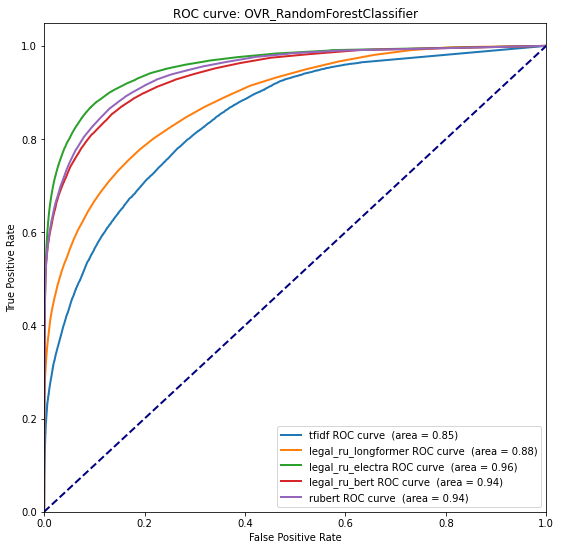

In [15]:
#path = '/content/'   # путь к папке
# path = '/content/drive/MyDrive/MODELS/create_embed/'
# batch = 80 
# name_dataset = f'{path}contract_labels-15000.tsv'
#['Metric (weighted)'] = ['precision', 'recall', 'f1']
fig, axs = plt.subplots(figsize=(9, 9))
for module_url in module_urls:
      print(module_url)
      df = pd.read_csv(name_dataset, delimiter='\t')
      if module_url == 'tfidf':
          print('tfidf')
          data =  df['text']
          tf_idf_vectorizor =  TfidfVectorizer(max_features = 20)
          tf_idf = tf_idf_vectorizor.fit_transform( data)
          tf_idf_norm =  normalize(tf_idf)
          features = tf_idf_norm.toarray()
      else:
          features_file = f'{path}{module_url}_features_batch_{batch}.txt'
          with open(features_file, "rb") as f:    
              features = np.loadtxt(f)
      len_features = len(features)          
      labels = df['labels'][:len_features]          #
      labels = label_binarize(labels, classes=['качество', 'конфиденциальность','обязанности сторон','оплат', 'ответственность сторон', 'предмет договора', 'приёмка товара', 'прочие условия', 'споров', 'срок действия договора','сроки поставки', 'форс-мажор' ])
      n_classes = labels.shape[1]         
      train_features, test_features, train_labels, test_labels = train_test_split(features, labels)
      names = ['OVR_RandomForestClassifier']         
      classifiers = [
          OneVsRestClassifier(RandomForestClassifier())
          ]
      for name, clf in zip(names, classifiers):
          t0 = time.time() 
          clf.fit(train_features, train_labels) 
          path_algoritm = f'{path}/{module_url}_{name}'
          with open (path_algoritm, 'wb') as f:
              pickle.dump(clf, f)    
          # with open (path_algoritm, 'rb') as f:
          #     clf =  pickle.load(f)
          predictions = clf.predict(test_features)              
          accuracy_score = metrics.accuracy_score(test_labels, predictions)                 
          #y_score = clf.decision_function(test_features)   
          y_score = clf.predict_proba(test_features)
          fpr = dict()
          tpr = dict()
          roc_auc = dict()
          for i in range(n_classes):
              fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_score[:, i])
              roc_auc[i] = auc(fpr[i], tpr[i])
          # Compute micro-average ROC curve and ROC area
          fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), y_score.ravel())
          roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
          lw = 2
          plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='%s ROC curve  (area = %0.2f)' % (module_url,roc_auc['micro']))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.figure()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve: {name}')
plt.legend(loc="lower right")
plt.show()

#  Clusterization

In [16]:
batch = 80
path = '/content/'

In [42]:
module_url = "legal_ru_electra" #@param ["legal_ru_electra", "legal_ru_longformer", "legal_ru_bert", "rubert", "muse", "laser"]

In [43]:
features_file = f'{path}{module_url}_features_batch_{batch}.txt'

In [44]:
with open(features_file, "rb") as f:    
    features = np.loadtxt(f)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.99)
features = train_features
points = np.vstack(features)
print(points)
len(points)

[[-1.67722332 -0.42340639 -2.53964305 ...  0.93172544 -0.30122316
  -0.80314481]
 [-1.04773331 -0.2359501  -3.15332007 ...  1.22086    -0.03908416
  -0.15899055]
 [-0.79576886 -1.0205456  -2.76745915 ...  1.78146529  0.20792302
   0.28825942]
 ...
 [-0.70322883  0.22745866 -3.04272461 ...  2.10109758 -1.33204281
  -1.51273584]
 [-0.16218655  0.41841292 -1.87123013 ...  1.52488947 -0.5832954
  -1.23252547]
 [-0.57898289 -0.56578481 -2.48614597 ...  1.52002764  0.3100169
  -0.86892617]]


692

In [12]:
name_dataset = f'{path}contract_labels-15000.tsv'
df = pd.read_csv(name_dataset, delimiter='\t')
data =  df['text']
tf_idf_vectorizor =  TfidfVectorizer(max_features = 20)
tf_idf = tf_idf_vectorizor.fit_transform( data)
tf_idf_norm =  normalize(tf_idf)
points = tf_idf_norm.toarray()

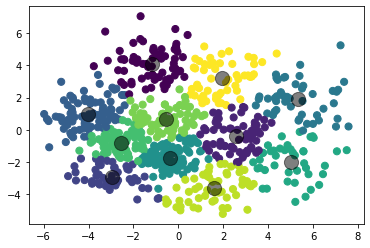

In [45]:
from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
sklearn_pca =  PCA( n_components =  2)
Y_sklearn = sklearn_pca.fit_transform(points)
kmeans = KMeans(n_clusters=11, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction =  kmeans.predict( Y_sklearn)
centers =  kmeans.cluster_centers_
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1 ], c= prediction, s= 50, cmap= 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);
plt.show()

# Testing Machine Learning Models

## Translation from ordinary language to legal language

In [22]:
!pip install flair

     |████████████████████████████████| 450kB 16.7MB/s 
     |████████████████████████████████| 1.1MB 40.5MB/s 
     |████████████████████████████████| 798kB 51.1MB/s 
     |████████████████████████████████| 983kB 54.1MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 19.7MB 159kB/s 
     |████████████████████████████████| 1.3MB 49.6MB/s 
     |████████████████████████████████| 2.9MB 39.3MB/s 
  Created wheel for sqlitedict: filename=sqlitedict-1.7.0-cp36-none-any.whl size=14376 sha256=753a64b760a3af7cf3a7961befdffcab17076de508da32faf6f9182f81951364
  Stored in directory: /root/.cache/pip/wheels/cf/c6/4f/2c64a43f041415eb8b8740bd80e15e92f0d46c5e464d8e4b9b
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116678 sha256=4af84bb318dc1c4ed6c68afe82dedc2e44ae14b62f1870d98ee36ada08e51335
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for langdetect: 

In [23]:
!pip install sentence_transformers

     |████████████████████████████████| 71kB 10.4MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp36-none-any.whl size=103068 sha256=ce6efdb9f84beb3be4dd75cde6dbbf637fd80bb1356195f34875749177b487fe
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
Successfully built sentence-transformers


In [24]:
from sentence_transformers import SentenceTransformer, models
model_1 = SentenceTransformer('DeepPavlov/rubert-base-cased-sentence')
word_embedding_model = models.Transformer('/content/legal_ru_bert', max_seq_length=758)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
model_2 = SentenceTransformer(modules=[word_embedding_model, pooling_model])

Exception when trying to download https://sbert.net/models/DeepPavlov/rubert-base-cased-sentence.zip. Response 404


Some weights of BertModel were not initialized from the model checkpoint at /content/legal_ru_bert and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
import bokeh
import bokeh.models
import bokeh.plotting
import numpy as np
import os
import pandas as pd
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from tensorflow_text import SentencepieceTokenizer
import sklearn.metrics.pairwise

from simpleneighbors import SimpleNeighbors
from tqdm import tqdm
from tqdm import trange

def visualize_similarity(embeddings_1, embeddings_2, labels_1, labels_2,
                         plot_title,
                         plot_width=1200, plot_height=600,
                         xaxis_font_size='12pt', yaxis_font_size='12pt'):

  assert len(embeddings_1) == len(labels_1)
  assert len(embeddings_2) == len(labels_2)

  # arccos based text similarity (Yang et al. 2019; Cer et al. 2019)
  sim = 1 - np.arccos(
      sklearn.metrics.pairwise.cosine_similarity(embeddings_1,
                                                 embeddings_2))/np.pi

  embeddings_1_col, embeddings_2_col, sim_col = [], [], []
  for i in range(len(embeddings_1)):
    for j in range(len(embeddings_2)):
      embeddings_1_col.append(labels_1[i])
      embeddings_2_col.append(labels_2[j])
      sim_col.append(sim[i][j])
  df = pd.DataFrame(zip(embeddings_1_col, embeddings_2_col, sim_col),
                    columns=['embeddings_1', 'embeddings_2', 'sim'])

  mapper = bokeh.models.LinearColorMapper(
      palette=[*reversed(bokeh.palettes.YlOrRd[9])], low=df.sim.min(),
      high=df.sim.max())

  p = bokeh.plotting.figure(title=plot_title, x_range=labels_1,
                            x_axis_location="above",
                            y_range=[*reversed(labels_2)],
                            plot_width=plot_width, plot_height=plot_height,
                            tools="save",toolbar_location='below', tooltips=[
                                ('pair', '@embeddings_1 ||| @embeddings_2'),
                                ('sim', '@sim')])
  p.rect(x="embeddings_1", y="embeddings_2", width=1, height=1, source=df,
         fill_color={'field': 'sim', 'transform': mapper}, line_color=None)

  p.title.text_font_size = '12pt'
  p.axis.axis_line_color = None
  p.axis.major_tick_line_color = None
  p.axis.major_label_standoff = 16
  p.xaxis.major_label_text_font_size = xaxis_font_size
  p.xaxis.major_label_orientation = 0.25 * np.pi
  p.yaxis.major_label_text_font_size = yaxis_font_size
  p.min_border_right = 300

  bokeh.io.output_notebook()
  bokeh.io.show(p)

In [26]:
legal_example_1 = ["акция", "кредит", "вы должны деньги"]
example_2 =  ["Акционная ценная бумага", "кредитный договор", "задолжность по договору" ]

In [27]:
embeddings1 = model_1.encode(legal_example_1)
embeddings2 = model_2.encode(example_2)
embedding_1 = [i for i in embeddings1]
embedding_2 = [i for i in embeddings2]
print(embeddings1)
visualize_similarity(embedding_1, embedding_2, legal_example_1, example_2,  "Legal_Ru_Bert и Deeppavlov/Rubert")

[[ 0.07098573 -0.4480177  -0.2925252  ... -0.26031396 -0.14592563
   0.6267974 ]
 [-0.01293274 -0.9957485   0.26244333 ...  0.7912138   0.17389542
   0.8531346 ]
 [-0.12163503 -0.85952914  0.7581258  ... -0.05481099 -0.39119488
   1.428231  ]]


In [28]:
embeddings1 = model_1.encode(legal_example_1)
embeddings2 = model_1.encode(example_2)
embedding_1 = [i for i in embeddings1]
embedding_2 = [i for i in embeddings2]
print(embeddings1)
visualize_similarity(embedding_1, embedding_2, legal_example_1, example_2,  "Deeppavlov/Rubert") 

[[ 0.07098573 -0.4480177  -0.2925252  ... -0.26031396 -0.14592563
   0.6267974 ]
 [-0.01293274 -0.9957485   0.26244333 ...  0.7912138   0.17389542
   0.8531346 ]
 [-0.12163503 -0.85952914  0.7581258  ... -0.05481099 -0.39119488
   1.428231  ]]


In [29]:
embeddings1 = model_2.encode(legal_example_1)
embeddings2 = model_2.encode(example_2)
embedding_1 = [i for i in embeddings1]
embedding_2 = [i for i in embeddings2]
print(embeddings1)
visualize_similarity(embedding_1, embedding_2, legal_example_1, example_2,  "Legal_Ru_Bert")

[[ 0.23752105 -1.3017569  -1.3927515  ... -0.81669766 -0.50921524
   0.3035076 ]
 [ 1.3035007  -0.64256924 -0.78371495 ... -0.88913006 -0.11925572
  -0.5337771 ]
 [ 0.7104647  -0.17116809  0.66716886 ...  0.15383281  0.43772396
   0.3622445 ]]


## Сlassification paragraph of the contract

In [30]:
!pip install nltk
!pip install python-docx 

     |████████████████████████████████| 5.5MB 15.1MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp36-none-any.whl size=184491 sha256=f3e077ca01dde5ee5b0c5ea397e8ff47e0cbc07ea36ce2e29bc85c8cefea7461
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


In [31]:
import pandas as pd
import posixpath
import urllib.parse
import docx
import os     
import pandas as pd
import csv
import subprocess
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import brown
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
id = '1gj1qQItYl_6E5ndXQa-YbBZ17oKBmT37'
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$id' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$id" -O Договор_поставки.zip && rm -rf /tmp/cookies.txt
!unzip -uq Договор_поставки.zip

--2021-02-01 11:57:56--  https://docs.google.com/uc?export=download&confirm=&id=1gj1qQItYl_6E5ndXQa-YbBZ17oKBmT37
Resolving docs.google.com (docs.google.com)... 172.217.13.78, 2607:f8b0:4004:811::200e
Connecting to docs.google.com (docs.google.com)|172.217.13.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-8g-docs.googleusercontent.com/docs/securesc/lf67o1qo658p3s4ru2gg9pu4ilc987kp/3mov4t3rlv3tff7arge2vablsbjg8re7/1612180650000/18010547156067015791/08311071257812606474Z/1gj1qQItYl_6E5ndXQa-YbBZ17oKBmT37?e=download [following]
--2021-02-01 11:57:57--  https://doc-0o-8g-docs.googleusercontent.com/docs/securesc/lf67o1qo658p3s4ru2gg9pu4ilc987kp/3mov4t3rlv3tff7arge2vablsbjg8re7/1612180650000/18010547156067015791/08311071257812606474Z/1gj1qQItYl_6E5ndXQa-YbBZ17oKBmT37?e=download
Resolving doc-0o-8g-docs.googleusercontent.com (doc-0o-8g-docs.googleusercontent.com)... 172.217.5.225, 2607:f8b0:4004:804::2001
Connecting to doc-0o-8g-do

In [33]:
from docx import Document  
import pprint
def func():
    mydict = {}
    doc = docx.Document('/content/Договор поставки.docx')       
    bold = []
    pattern = ["предмет договора", 'обязанности сторон', 'оплат', 'цен','споров','форс-мажор','обстоятельства непреодолимой силы','приёмка товара','прочие условия','срок действия договора','качество', 'сроки поставки', 'ответственность сторон','конфиденциальность']
    all = '' 
    for para in doc.paragraphs:    
        for r in para.runs:
            if r.font.bold:            
                bold.append(r.text)
            if r.font.italic:           
                bold.append(r.text)        
    for para in doc.paragraphs:     
        all +=para.text
    index_start_text = [] 
    index_end_text = [] 
    head_pattern = []
    titles = []
    for title in bold:
      for p in pattern:
        if title.lower().find(p) != -1 :
          head_pattern.append(p)
          titles.append(title)        
          start_title = all.find(title)
          end_title = start_title+len(title)        
          index_start_text.append(end_title)       
    index_start_text.append(index_start_text[len(index_start_text)-1]+100)
    len_index_start_text = len(index_start_text)
    try:
      for title, ind_start_text, head in zip(titles, index_start_text, head_pattern):
        print('title ', title)        
        find_next_index_in_list= index_start_text.index(ind_start_text)+1
        index_end_text = index_start_text[find_next_index_in_list]-len(title)
        text_parag = all[ind_start_text:index_end_text]
        sent = sent_tokenize(text_parag)            
        mydict[head] = text_parag[5:1000]
    except Exception as e:
      print(e)  
    return mydict

In [34]:
mydict = func()
df = pd.DataFrame.from_dict(mydict, orient='index')
df = df.transpose()
df.head()

title  Предмет договора
title  Цена и порядок расчетов
title  . Ответственность сторон
title  Разрешение споров


,предмет договора,цен,ответственность сторон,споров
0,стоящему договору Поставщик обязуется в обусло...,"Товара включает стоимость товара, НДС, стоимос...",В случае неисполнения или ненадлежащего исполн...,Все споры и разногласия разрешаются путем пере...


In [54]:
module_url = "legal_ru_bert" #@param ["legal_ru_electra", "legal_ru_longformer", "legal_ru_bert", "DeepPavlov/rubert-base-cased"]

In [55]:
model_type = BertModel #@param ["ElectraModel", "AutoModel", "LongformerModel", "BertModel"] {type:"raw", allow-input: true}
model = model_type.from_pretrained(module_url) 

Some weights of BertModel were not initialized from the model checkpoint at legal_ru_bert and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [56]:
tokenizer_type = BertTokenizer #@param ["AutoTokenizer", "ElectraTokenizerFast", "LongformerTokenizer", "BertTokenizer"] {type:"raw", allow-input: true}
tokenizer = tokenizer_type.from_pretrained(module_url)

In [57]:
path = '/content/'   # путь к папке
#path = '/content/drive/MyDrive/MODELS/create_embed'
path_algoritm = f'{path}/{module_url}_OVR_RandomForestClassifier'
with open (path_algoritm, 'rb') as f:
      clf =  pickle.load(f)

In [58]:
mydict.items()

dict_items([('предмет договора', 'стоящему договору Поставщик обязуется в обусловленный срок передать  шиномонтажный станок (далее – Товар) в собственность Покупателя, а Покупатель обязуется принять и оплатить Товар в соответствии с настоящим Договором, соответствующими счетами-фактурами и товарными накладными.Количество, ассортимент и стоимость Товара определяется в Спецификациях, подписываемых сторонами и, являющейся неотъемлемой частью настоящего договора  (Приложение №1). 1.3. Качество Товара должно соответствовать образцам Товара (если поставка Товара осуществляется по образцам) и каталогу изготовителя (если поставка осуществляется по каталогам) и подтверждаться сертификатами соответствия/гигиеническими заключениями на Товар, подлежащий обязательной сертификации. Сертификаты соответствия передаются Поставщиком Покупателю одновременно с каждой поставкой партии Товара.1.4. Поставщик гарантирует, что Товар был приобретен им у Производителя либо у официально уполномоченного им лица (о

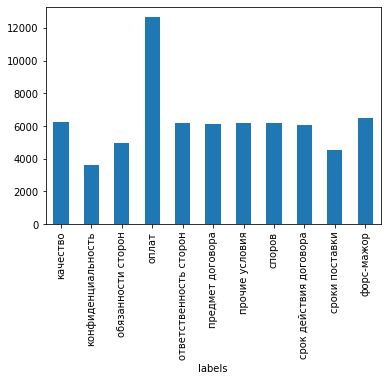

In [60]:
name_dataset = f'{path}/contract_labels-15000.tsv'
df = pd.read_csv(name_dataset, delimiter='\t')
labels = df['labels']
labels_bin = label_binarize(labels, classes=['качество', 'конфиденциальность','обязанности сторон','оплат', 'ответственность сторон', 'предмет договора', 'приёмка товара', 'прочие условия', 'споров', 'срок действия договора','сроки поставки', 'форс-мажор' ])

df.groupby(['labels'])['labels'].count().plot(kind='bar')

KeyError: ignored